In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pickle
from scipy.interpolate import interp1d

import numpy as np
#from ler.rates import LeR
import json
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.cosmology import LambdaCDM
cosmoLambdaCDM = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
cosmo = cosmoLambdaCDM

from astropy.cosmology import Planck18

from scipy.integrate import quad, dblquad
from scipy.stats import gengamma, rayleigh
from scipy.special import gamma

from numba import njit, jit
from ler.utils import rejection_sample
from scipy.interpolate import interp1d

from ler.utils import interpolator_from_pickle

In [21]:
import optical_depth2
#reload(test)
import importlib
importlib.reload(optical_depth2)

<module 'optical_depth2' from '/Users/phurailatpamhemantakumar/phd/mypackages/ler/examples/optical_depth/optical_depth2.py'>

In [19]:
# SIS haris
import optical_depth2
#reload(test)
import importlib
importlib.reload(optical_depth2)

od1 = optical_depth2.OpticalDepth(
    nsamples_z=100,
    nsamples_sigma=50,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIS_haris",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_haris",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        lens_redshift=dict(z_min=0.001, z_max=10),
        velocity_dispersion=dict(vd_min=60, vd_max=600),
        axis_ratio=dict(q_min=0.01, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    )

z_to_Dc interpolator will be loaded from ./interpolator/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator/differential_comoving_volume/differential_comoving_volume_0.pickle


In [46]:
# SIS hemanta
import optical_depth2
#reload(test)
import importlib
importlib.reload(optical_depth2)

import mp
#reload(test)
import importlib
importlib.reload(mp)

od2 = optical_depth2.OpticalDepth(
    nsamples_z=100,
    nsamples_sigma=50,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIS_hemanta",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_bernardi",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        lens_redshift=dict(z_min=0.001, z_max=10),
        velocity_dispersion=dict(vd_min=60, vd_max=600),
        axis_ratio=dict(q_min=0.01, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(velocity_dispersion=False, optical_depth=True, z_to_Dc=False, Dc_to_z=False, angular_diameter_distance=False, differential_comoving_volume=False)
    )


z_to_Dc interpolator will be loaded from ./interpolator/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_bernardi/velocity_dispersion_bernardi_0.pickle
optical_depth_SIS_hemanta interpolator will be generated at ./interpolator/optical_depth_SIS_hemanta/optical_depth_SIS_hemanta_0.pickle


In [47]:
# SIE vd bernardi
import optical_depth2
#reload(test)
import importlib
importlib.reload(optical_depth2)

import mp
#reload(test)
import importlib
importlib.reload(mp)

od3 = optical_depth2.OpticalDepth(
    nsamples_z=100,
    nsamples_sigma=50,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIE_hemanta",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_bernardi",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        lens_redshift=dict(z_min=0.001, z_max=10),
        velocity_dispersion=dict(vd_min=60, vd_max=600),
        axis_ratio=dict(q_min=0.01, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(velocity_dispersion=False, optical_depth=True, z_to_Dc=False, Dc_to_z=False, angular_diameter_distance=False, differential_comoving_volume=False)
    )

z_to_Dc interpolator will be loaded from ./interpolator/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_bernardi/velocity_dispersion_bernardi_0.pickle
optical_depth_SIE_hemanta interpolator will be generated at ./interpolator/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_1.pickle


INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates


In [48]:
# SIE vd ewoud
import optical_depth2
#reload(test)
import importlib
importlib.reload(optical_depth2)

import mp
#reload(test)
import importlib
importlib.reload(mp)

od4 = optical_depth2.OpticalDepth(
    nsamples_z=100,
    nsamples_sigma=50,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIE_hemanta",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_ewoud",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        lens_redshift=dict(z_min=0.001, z_max=10),
        velocity_dispersion=dict(vd_min=60, vd_max=600),
        axis_ratio=dict(q_min=0.01, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(velocity_dispersion=False, optical_depth=True, z_to_Dc=False, Dc_to_z=False, angular_diameter_distance=False, differential_comoving_volume=False)
    )

z_to_Dc interpolator will be loaded from ./interpolator/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_0.pickle
optical_depth_SIE_hemanta interpolator will be generated at ./interpolator/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_2.pickle


INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates


In [49]:
# SIE vd ewoud
import optical_depth2
#reload(test)
import importlib
importlib.reload(optical_depth2)

import mp
#reload(test)
import importlib
importlib.reload(mp)

od5 = optical_depth2.OpticalDepth(
    nsamples_z=100,
    nsamples_sigma=50,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIE_hemanta",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_ewoud",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        lens_redshift=dict(z_min=0.001, z_max=10),
        velocity_dispersion=dict(vd_min=60, vd_max=600),
        axis_ratio=dict(q_min=0.01, q_max=1),
    ),
    cosmology=Planck18,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(velocity_dispersion=False, optical_depth=True, z_to_Dc=False, Dc_to_z=False, angular_diameter_distance=False, differential_comoving_volume=False)
    )

z_to_Dc interpolator will be loaded from ./interpolator/z_to_Dc/z_to_Dc_2.pickle
Dc_to_z interpolator will be loaded from ./interpolator/Dc_to_z/Dc_to_z_2.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator/differential_comoving_volume/differential_comoving_volume_1.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_0.pickle
optical_depth_SIE_hemanta interpolator will be generated at ./interpolator/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_2.pickle
INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates


In [301]:
from ler.lens_galaxy_population import optical_depth
od4 = optical_depth.OpticalDepth(
    nsamples_z=100,
    nsamples_sigma=50,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIE_hemanta",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_ewoud",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        lens_redshift=dict(z_min=0.001, z_max=10),
        velocity_dispersion=dict(vd_min=60, vd_max=600),
        axis_ratio=dict(q_min=0.01, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(velocity_dispersion=False, optical_depth=True, z_to_Dc=False, Dc_to_z=False, angular_diameter_distance=False, differential_comoving_volume=False)
    )

z_to_Dc interpolator will be loaded from ./interpolator/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_0.pickle
optical_depth_SIE_hemanta interpolator will be generated at ./interpolator/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_2.pickle


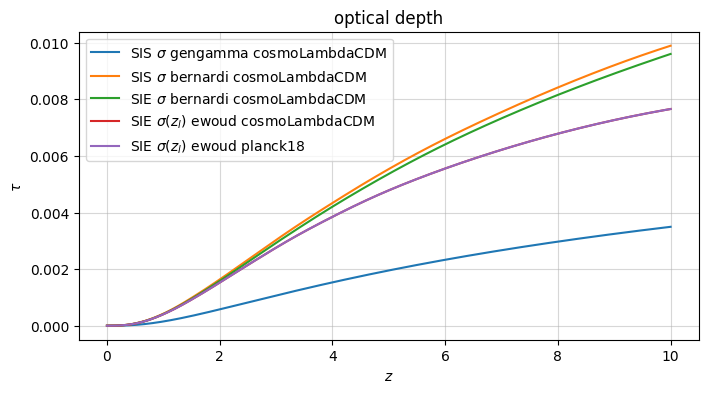

In [54]:
z = np.linspace(0.001, 10, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od1.optical_depth(z), label=r"SIS $\sigma$ gengamma cosmoLambdaCDM")
plt.plot(z, od2.optical_depth(z), label=r"SIS $\sigma$ bernardi cosmoLambdaCDM")
plt.plot(z, od3.optical_depth(z), label=r"SIE $\sigma$ bernardi cosmoLambdaCDM")
plt.plot(z, od4.optical_depth(z), label=r"SIE $\sigma(z_l)$ ewoud cosmoLambdaCDM")
plt.plot(z, od4.optical_depth(z), label=r"SIE $\sigma(z_l)$ ewoud planck18")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

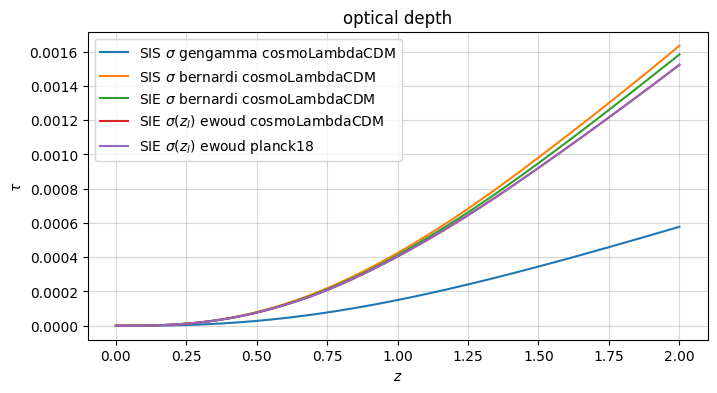

In [55]:
z = np.linspace(0.001, 2, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od1.optical_depth(z), label=r"SIS $\sigma$ gengamma cosmoLambdaCDM")
plt.plot(z, od2.optical_depth(z), label=r"SIS $\sigma$ bernardi cosmoLambdaCDM")
plt.plot(z, od3.optical_depth(z), label=r"SIE $\sigma$ bernardi cosmoLambdaCDM")
plt.plot(z, od4.optical_depth(z), label=r"SIE $\sigma(z_l)$ ewoud cosmoLambdaCDM")
plt.plot(z, od4.optical_depth(z), label=r"SIE $\sigma(z_l)$ ewoud planck18")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

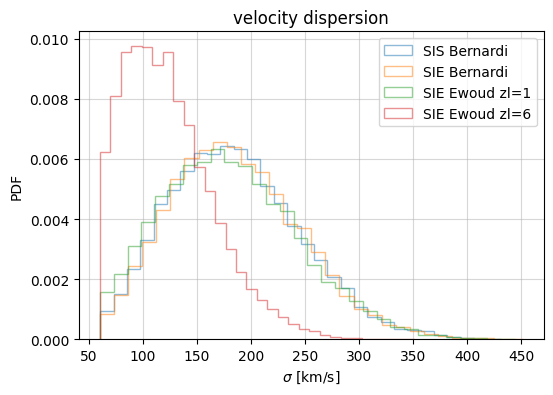

In [59]:
sigma2 = od2.sample_velocity_dispersion(size=10000)
sigma3 = od3.sample_velocity_dispersion(size=10000)
sigma4 = od4.sample_velocity_dispersion(size=10000, zl=1)
sigma5 = od4.sample_velocity_dispersion(size=10000, zl=6)

# plot hist
plt.figure(figsize=(6,4))
plt.hist(sigma2, bins=30, density=True, alpha=0.5, label="SIS Bernardi", histtype="step")
plt.hist(sigma3, bins=30, density=True, alpha=0.5, label="SIE Bernardi", histtype="step")
plt.hist(sigma4, bins=30, density=True, alpha=0.5, label="SIE Ewoud zl=1", histtype="step")
plt.hist(sigma5, bins=30, density=True, alpha=0.5, label="SIE Ewoud zl=6", histtype="step")
plt.xlabel(r"$\sigma$ [km/s]")
plt.ylabel("PDF")
plt.legend()
plt.grid(alpha=0.5)
plt.title("velocity dispersion")
plt.show()

## Integration test

In [1]:
# multiprocessing
from multiprocessing import Pool
import numpy as np

In [30]:
import mp
#reload(test)
import importlib
importlib.reload(mp)

<module 'mp' from '/Users/phurailatpamhemantakumar/phd/mypackages/ler/examples/optical_depth/mp.py'>

In [3]:
class mp_test():
    def __init__(self, npool=4):
        self.npool = npool

    # define a test function
    def integrand(self, zl, zs):
        return zl+zs

    def integrate1(self, zs):
        old = 0
        new = 0
        min = 0
        list = []
        for z in zs:
            new = old+quad(self.integrand, min, z, args=(z))[0]
            list.append(new)
            old = new
            min = z
        return list

    def integrate2(self, zs):
        list = []
        for z in zs:
            list.append(quad(self.integrand, 0, z, args=(z))[0])
        return list

    def integrate3(self, zs):

        # setup parameters for multiprocessing
        #object_list = [[zs[i],self.integrand] for i in range(len(zs))]

        # setup multiprocessing
        with Pool(processes=self.npool) as pool:
            result = list(pool.imap(mp.integrate_mp, zs))

        #result = mp.integrate_mp(object_list[1])
        return result

In [29]:
mp.optical_depth_sie2_mp(1)

INFO:numba.core.transforms:finding looplift candidates


0.00040414733012514477

In [5]:
zs = np.linspace(0.001, 10, 100)
with Pool(processes=4) as pool:
    result = list(pool.imap(mp.integrate_mp, zs))

In [452]:
result

[0.00042022138061757974, 0.0016084826333373904, 0.0029526090698057863]

In [12]:
zs = np.linspace(0.001, 10, 100)
result = od4.optical_depth_calculator(zs)

INFO:numba.core.transforms:finding looplift candidates


* for 100 points of zs
* 4 core multiprocessing takes only 28s (with jit on axis ratio)
* 4 core multiprocessing takes 28s (without jit on axis ratio). No point in using jit on axis ratio.
* 1 core takes 1m 38s
* there is significant improvement 

In [3]:
@jit
def axis_ratio_rayleigh(sigma, q_min=0.2, param=None):
    """
    Function to sample axis ratio from rayleigh distribution with given velocity dispersion.

    Parameters
    ----------
    sigma : `float: array`
        velocity dispersion of the lens galaxy

    Returns
    -------
    q : `float: array`
        axis ratio of the lens galaxy
    """

    if param:
        q_min = param["q_min"]

    size = len(sigma)
    a = sigma / 161.0
    q = np.ones(size)
    idx = np.arange(size)  # idx tracker
    size_ = size

    while size_ != 0:
        # Draw the axis ratio see Appendix of https://arxiv.org/pdf/1807.07062.pdf
        s = abs(0.38 - 0.09177 * a[idx])
        b = rayleigh.rvs(scale=s, size=size_)
        q_ = 1.0 - b

        # Weed out axis ratios that have axis ratio below q_min
        idx2 = q_ > q_min
        q[idx[idx2]] = q_[idx2]

        # remaining idx from the original array
        # that still not have axis ratio above q_min
        idx = idx[q <= q_min]
        size_ = len(idx)

    return q

In [ ]:
%timeit 